<a href="https://colab.research.google.com/github/supraja57/DSP/blob/master/Day_23(19_06_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Creating a new column in the dataset by adding SibSp and Parch column
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Ticket ----> As it is just a ticket num not related to our analysis we can skip that

In [ ]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# Based on categoaries we will analyse which category people are more likel;y to survuve
# Low, Mid, mid-High, High
df['Fare_Category'] = pd.cut(df.Fare, bins = [0,7.9,14.45,31.00,512], 
                                           labels = ['low', 'Mid', 'Mid-High', 'High'] )
df['Fare_Category'].head()

0     low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [low < Mid < Mid-High < High]

In [ ]:
#Comparing the fare category
df[['Fare', 'Fare_Category']]

,Fare,Fare_Category
0,7.2500,low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


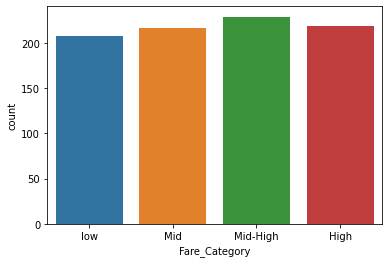

In [ ]:
## Visualise te fare category
## Countplot give entire amount of category------>categories of Survived and deceased
sns.countplot(x = 'Fare_Category', data=df)

# As we can see the peolpe from different categories like 'Low', 'Mid', 'Mid-High' and 'High' are approximately equal in number

Text(0.5, 1.0, 'Survived on Fare Category')

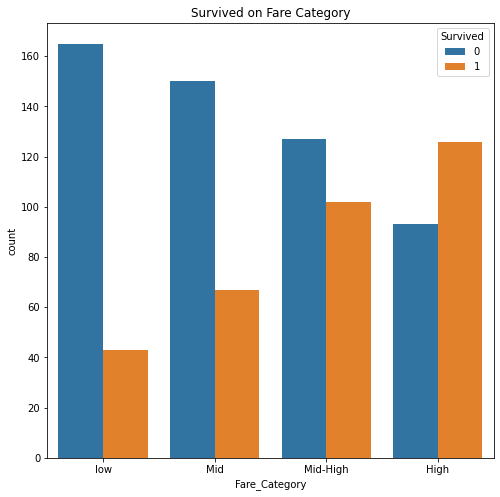

In [ ]:
# Visualising the no. of people survuved in each category
plt.figure(figsize=(8,8))
sns.countplot(x = 'Fare_Category', hue = 'Survived', data=df).\
                   set_title("Survived on Fare Category")

# As the category goes on icreasing the no. of peolpe survived is also  increasing

In [ ]:
# Embarked----->port from which passengers boarded the ship
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Embarked----->port from which passengers boarded the ship
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

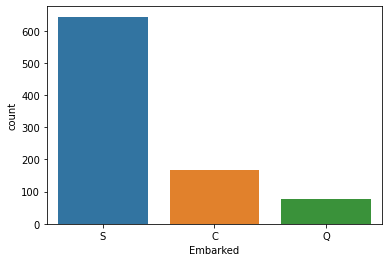

In [ ]:
# Visualising port column
sns.countplot(x = 'Embarked', data=df)

Text(0.5, 1.0, 'Survived based on port baorded')

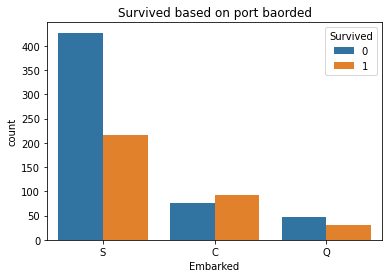

In [ ]:
# Visualising port column
sns.countplot(x = 'Embarked', hue='Survived', data=df).\
                    set_title("Survived based on port baorded")

# People who boarded from South Hampton port are more in no. of people who are deceased and as well as Survived when compared to pepole who boarded from other two ports

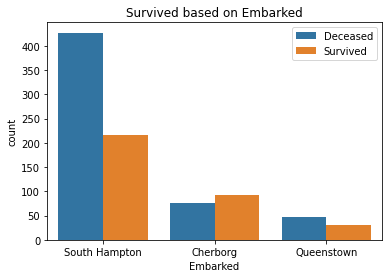

In [ ]:
p = sns.countplot(x = 'Embarked', hue='Survived', data=df)
p.set_xticklabels(['South Hampton', 'Cherborg', 'Queenstown'])
p.set_title('Survived based on Embarked')
p.legend(labels=['Deceased', 'Survived'])

In [ ]:
### Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [ ]:
## Cabin----->77% missing values,we are gong to create new ctaegory as NA
df.Cabin.fillna('NA',inplace=True)

In [ ]:
df.Cabin.isnull().sum()

0

In [ ]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Median ----->sorting in ordxer to median value nan in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(), inplace=True)
df.Age.isnull().sum()

0

In [ ]:
## Imputing the Embarked column----> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.Embarked.isnull().sum()


0

In [ ]:
# Imputing the  Fare category Column
df.Fare_Category.isnull().sum()

18

In [ ]:

df.Fare_Category.fillna(df.Fare_Category.mode()[0], inplace=True)
df.Fare_Category.isnull().sum()


0

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

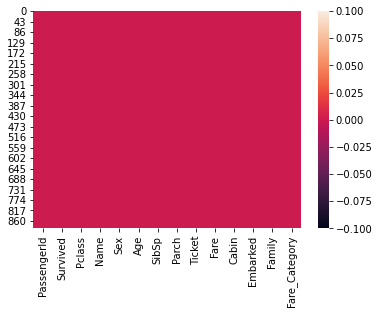

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [ ]:
df['Age-Range'] = pd.cut(df.Age, [0,10,20,30,40,60,80,])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [ ]:
## Encoding of categorical data columns
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True) # n columns , we need to include upto n-21 dummy columns

In [ ]:
df = pd.concat([df, dummy_set], axis=1)

In [ ]:
## Encoding of categorical variables/columns
df = pd.concat([df, pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
                pd.get_dummies(df.Embarked, prefix='Emb', drop_first=True),
                pd.get_dummies(df.Fare_Category, prefix='Fare', drop_first=True),
                pd.get_dummies(df['Age-Range'], drop_first=True)], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,low,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
# Encoding SexColumn
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,S,1,low,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
               'Emb_Q',         'Emb_S',      'Fare_Mid', 'Fare_Mid-High',
           'Fare_High',        (10, 20],        (20, 30],        (30, 40],
              (40, 60],        (60, 80]],
      dtype='object', length=175)

In [ ]:
df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked','Fare_Category','Age-Range'],axis=1,inplace=True)
df.shape

(891, 165)

In [ ]:
df.head()

,Survived,Pclass,Sex,Cabin,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,NA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,C85,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,NA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,1,0,C123,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,3,1,NA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
df.dtypes

Survived     int64
Pclass       int64
Sex          int64
Cabin       object
Family       int64
             ...  
(10, 20]     uint8
(20, 30]     uint8
(30, 40]     uint8
(40, 60]     uint8
(60, 80]     uint8
Length: 165, dtype: object

In [ ]:
## StandardScaler--->not required for this(distnace based algorithms)

In [ ]:
## Seperating input and output data
X = df.drop('Survived',axis=1)
X.shape

(891, 164)

In [ ]:
df.iloc[:,1]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
# Output Column
y = df.iloc[:,0]
y.shape

(891,)

In [ ]:
# Input and Output into training data and testing data
##Training---> we will be training the model on training data
##3Testing---->check the performance of model
## out 891 rows,75% of rows eill be in trainig database and 25% of rows will be in testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1) # random states 

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 164)
(223, 164)
(668,)
(223,)
